### Read Data

In [ ]:
!pip install pandas matplotlib numpy nltk seaborn sklearn gensim pyldavis wordcloud textblob spacy textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.8 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=e3e2a4aca364b2777d114b114a1729d59299d305501e16113fc9351fa2a47023
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5e76ebf0133ed113ad161677dec7e287e7b7be77d781f2914fd205329f5162f4
  Stored in directory:

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import io
import numpy as np
from datasets import load_dataset
import re
import string
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
import matplotlib.pyplot as plt
import collections
import seaborn as sns
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer


from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS


In [ ]:
dataset = load_dataset("nschantz21/ms_marco")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/8841823 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/nschantz21___parquet/nschantz21--ms_marco-bb6cef044cd6786a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = dataset['train'].shuffle(seed=42).select(range(8000)).to_pandas()

In [ ]:
df.tail()

,pid,passage
7995,4901153,The Western Toad was considered the most abund...
7996,4314225,LeberkÃ¤se is an emulsified sausage mixture th...
7997,5834217,Diffusion refers to the net movement of molecu...
7998,3684509,Ãber Ã¼ber did not return for The Pinoy Big: ...
7999,4864212,An example of direct voltage is the potential ...


In [ ]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}


In [ ]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  # Regular expression for finding contractions
  contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys())) 
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

def clean_data(df):

  # lower case everything
  df['cleaned']=df['passage'].apply(lambda x: x.lower())

  # Expanding Contractions in the reviews
  df['passage']=df['passage'].apply(lambda x:expand_contractions(x))

  # dropna
  df.dropna(inplace=True)

  # remove string punctuation
  df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

  # remove digits
  df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

  # remove symbols
  df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

  return df



In [ ]:
clean_data(df).head()

,pid,passage,cleaned
0,724055,*The use of the driveway as the required parki...,the use of the driveway as the required parkin...
1,5100609,Our STREETWISE Seville Map enables you to expl...,our streetwise seville map enables you to expl...
2,8351652,aaa coupon codes about aaa save an average of ...,aaa coupon codes about aaa save an average of ...
3,100703,"4. Press the tile into the mastic, and bump it...",press the tile into the mastic and bump it sl...
4,7344032,According to the Dictionary of Christianity in...,according to the dictionary of christianity in...


In [ ]:
df["cleaned"].str.len()

0       245
1       476
2       389
3       282
4       192
       ... 
7995    285
7996    449
7997    414
7998    212
7999    280
Name: cleaned, Length: 8000, dtype: int64

In [ ]:
df['cleaned'].str.len().mean()

317.537625

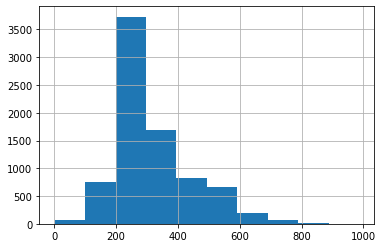

In [ ]:
df['cleaned'].str.len().hist()

The histogram shows that passafe ranges from 0 to 1000 characters and generally, it is between ~230 to ~260 characters.

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


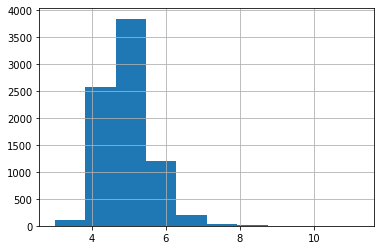

In [ ]:
df['cleaned'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

The number of words in document ranges from 5 to 12 and mostly falls between 5 to 7 words.

In [ ]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]
new= df['cleaned'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [ ]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

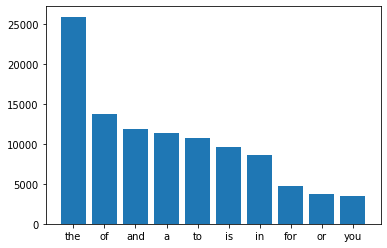

In [ ]:
plot_top_stopwords_barchart(df['cleaned'])


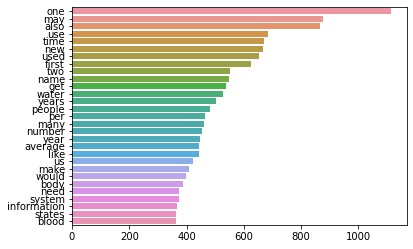

In [ ]:
counter=collections.Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:100]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [ ]:
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

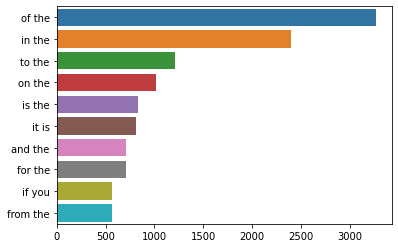

In [ ]:
top_n_bigrams= get_top_ngram(df["cleaned"],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

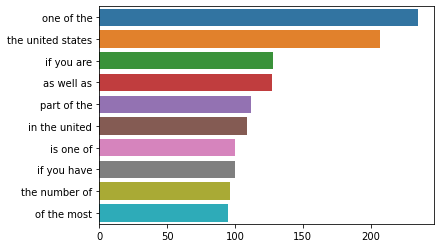

In [ ]:
top_tri_grams=get_top_ngram(df["cleaned"],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

In [ ]:
def plot_wordcloud(text):
    #nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


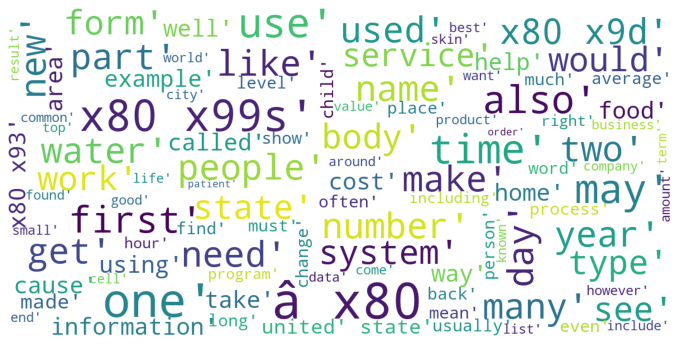

In [ ]:
nltk.download('omw-1.4')
plot_wordcloud(df['cleaned'])


# Topic Based Filtering Using Fuzzy C-Means

In [ ]:
!pip install -U sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=03a6b30139d53b8f92d4da4f9929f1675752a123006776603359fdcdf986dba1
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')


In [ ]:
corpus =  list(df["cleaned"])


In [ ]:
corpus_embeddings = embedder.encode(corpus)


## Fuzzy c Means

In [ ]:
! pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [ ]:
import numpy as np
from fcmeans import FCM

In [ ]:
my_model = FCM(n_clusters=5) # we use two cluster as an example
my_model.fit(corpus_embeddings) ## X, numpy array. rows:samples columns:features

In [ ]:
labels = my_model.predict(corpus_embeddings)


In [ ]:
print(labels)

[4 4 1 ... 2 4 3]


In [ ]:
df['labels'] = labels

In [ ]:
df.head()

,pid,passage,cleaned,labels
0,724055,*The use of the driveway as the required parki...,the use of the driveway as the required parkin...,4
1,5100609,Our STREETWISE Seville Map enables you to expl...,our streetwise seville map enables you to expl...,4
2,8351652,aaa coupon codes about aaa save an average of ...,aaa coupon codes about aaa save an average of ...,1
3,100703,"4. Press the tile into the mastic, and bump it...",press the tile into the mastic and bump it sl...,3
4,7344032,According to the Dictionary of Christianity in...,according to the dictionary of christianity in...,4


Elbow Method

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(corpus_embeddings)
    kmeanModel.fit(corpus_embeddings)
  
    distortions.append(sum(np.min(cdist(corpus_embeddings, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / corpus_embeddings.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(corpus_embeddings, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / corpus_embeddings.shape[0]
    mapping2[k] = kmeanModel.inertia_

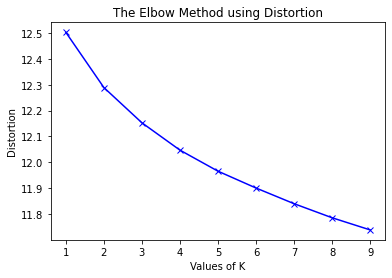

In [ ]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()